In [1]:
import anndata
import loompy
import scvelo as scv
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt

In [2]:
files = ["K19Wdr3512m_155.loom","K19Wdr3512m_186.loom","K19Wdr3512m_200.loom","K19Wdr3512m_158.loom",'K19Wdr3512m_168.loom',"K19Wdr3512m_176.loom",'K19Wdr3512m_177.loom']

In [3]:
loompy.combine(files, "merged.loom", key="Accession")

In [4]:
merge_data=anndata.read_loom("merged.loom")

In [5]:
merge_data.var_names_make_unique()

In [6]:
sample_obs = pd.read_csv("all_id.csv")
umap_cord = pd.read_csv("cell_embeddings.csv")
cell_clusters = pd.read_csv("hierarchical_clustering_4.csv")

In [7]:
merge_data = merge_data[np.isin(merge_data.obs.index,sample_obs["x"])]

In [8]:
merge_data.obs.index

Index(['K19Wdr3512m_155:ACTTTGTGTTGGGAACx',
       'K19Wdr3512m_155:AGTTCGAAGTACCCTAx',
       'K19Wdr3512m_155:ATGAGTCAGAAACTGTx',
       'K19Wdr3512m_155:ATCGATGGTTTACTGGx',
       'K19Wdr3512m_155:ATTCAGGGTGGAACACx',
       'K19Wdr3512m_155:ACTACGACACACCGACx',
       'K19Wdr3512m_155:ATCGTGAAGACATAGTx',
       'K19Wdr3512m_155:AACAGGGTCCTTCGACx',
       'K19Wdr3512m_155:AGTAGTCCAAGATTGAx',
       'K19Wdr3512m_155:AAAGGATGTTACCTGAx',
       ...
       'K19Wdr3512m_177:TTGACCCGTAGATCGGx',
       'K19Wdr3512m_177:TTTCCTCTCGTTGTGAx',
       'K19Wdr3512m_177:TGATGGTGTTGCACGCx',
       'K19Wdr3512m_177:TTCCTCTCAAGTCCCGx',
       'K19Wdr3512m_177:TTTATGCCAGCGCGTTx',
       'K19Wdr3512m_177:TGTACAGCAAGTGCTTx',
       'K19Wdr3512m_177:TGGGCTGAGGGTGGGAx',
       'K19Wdr3512m_177:TTCACCGTCCTAAGTGx',
       'K19Wdr3512m_177:TGGGAAGTCGTTCATTx',
       'K19Wdr3512m_177:TGGGCGTCAGTTAGGGx'],
      dtype='object', name='CellID', length=4026)

In [9]:
merge_index = pd.DataFrame(merge_data.obs.index)

In [10]:
merge_index=merge_index.rename(columns = {'CellID':'Cell ID'})

In [11]:
merge_index

,Cell ID
0,K19Wdr3512m_155:ACTTTGTGTTGGGAACx
1,K19Wdr3512m_155:AGTTCGAAGTACCCTAx
2,K19Wdr3512m_155:ATGAGTCAGAAACTGTx
3,K19Wdr3512m_155:ATCGATGGTTTACTGGx
4,K19Wdr3512m_155:ATTCAGGGTGGAACACx
...,...
4021,K19Wdr3512m_177:TGTACAGCAAGTGCTTx
4022,K19Wdr3512m_177:TGGGCTGAGGGTGGGAx
4023,K19Wdr3512m_177:TTCACCGTCCTAAGTGx
4024,K19Wdr3512m_177:TGGGAAGTCGTTCATTx


In [12]:
merge_data.obs.index

Index(['K19Wdr3512m_155:ACTTTGTGTTGGGAACx',
       'K19Wdr3512m_155:AGTTCGAAGTACCCTAx',
       'K19Wdr3512m_155:ATGAGTCAGAAACTGTx',
       'K19Wdr3512m_155:ATCGATGGTTTACTGGx',
       'K19Wdr3512m_155:ATTCAGGGTGGAACACx',
       'K19Wdr3512m_155:ACTACGACACACCGACx',
       'K19Wdr3512m_155:ATCGTGAAGACATAGTx',
       'K19Wdr3512m_155:AACAGGGTCCTTCGACx',
       'K19Wdr3512m_155:AGTAGTCCAAGATTGAx',
       'K19Wdr3512m_155:AAAGGATGTTACCTGAx',
       ...
       'K19Wdr3512m_177:TTGACCCGTAGATCGGx',
       'K19Wdr3512m_177:TTTCCTCTCGTTGTGAx',
       'K19Wdr3512m_177:TGATGGTGTTGCACGCx',
       'K19Wdr3512m_177:TTCCTCTCAAGTCCCGx',
       'K19Wdr3512m_177:TTTATGCCAGCGCGTTx',
       'K19Wdr3512m_177:TGTACAGCAAGTGCTTx',
       'K19Wdr3512m_177:TGGGCTGAGGGTGGGAx',
       'K19Wdr3512m_177:TTCACCGTCCTAAGTGx',
       'K19Wdr3512m_177:TGGGAAGTCGTTCATTx',
       'K19Wdr3512m_177:TGGGCGTCAGTTAGGGx'],
      dtype='object', name='CellID', length=4026)

In [13]:
umap=umap_cord.rename(columns={'Unnamed: 0':'Cell ID'})

In [14]:
umap['Cell ID']=sample_obs

In [15]:
umap

,Cell ID,UMAP_1,UMAP_2
0,K19Wdr3512m_155:AAAGGATGTTACCTGAx,-0.069690,2.541202
1,K19Wdr3512m_155:AACACACGTCTAGATCx,0.908840,-0.535170
2,K19Wdr3512m_155:AACAGGGTCCTTCGACx,1.359620,0.314845
3,K19Wdr3512m_155:AACGTCATCCGGACGTx,1.142799,-0.799663
4,K19Wdr3512m_155:AACTTCTGTTCGTACAx,1.377956,2.909411
...,...,...,...
4021,K19Wdr3512m_186:TTTACCACACCTCGTTx,-7.384750,2.520400
4022,K19Wdr3512m_186:TTTATGCCACAAATCCx,-0.623650,-2.778962
4023,K19Wdr3512m_186:TTTCCTCCAGTAGTTCx,-1.117822,-3.058650
4024,K19Wdr3512m_186:TTTGATCGTTACCTTTx,-0.673299,-2.237765


In [16]:
umap_ordered = merge_index.merge(umap, on = "Cell ID")

In [17]:
umap_ordered

,Cell ID,UMAP_1,UMAP_2
0,K19Wdr3512m_155:ACTTTGTGTTGGGAACx,1.665504,-0.895402
1,K19Wdr3512m_155:AGTTCGAAGTACCCTAx,1.394567,2.795608
2,K19Wdr3512m_155:ATGAGTCAGAAACTGTx,4.593543,-0.361025
3,K19Wdr3512m_155:ATCGATGGTTTACTGGx,1.442221,2.740466
4,K19Wdr3512m_155:ATTCAGGGTGGAACACx,-6.795504,1.519339
...,...,...,...
4021,K19Wdr3512m_177:TGTACAGCAAGTGCTTx,0.841331,-1.100736
4022,K19Wdr3512m_177:TGGGCTGAGGGTGGGAx,-1.857872,-3.237694
4023,K19Wdr3512m_177:TTCACCGTCCTAAGTGx,-1.363816,-4.072794
4024,K19Wdr3512m_177:TGGGAAGTCGTTCATTx,-1.383768,-2.755823


In [18]:
merge_index

,Cell ID
0,K19Wdr3512m_155:ACTTTGTGTTGGGAACx
1,K19Wdr3512m_155:AGTTCGAAGTACCCTAx
2,K19Wdr3512m_155:ATGAGTCAGAAACTGTx
3,K19Wdr3512m_155:ATCGATGGTTTACTGGx
4,K19Wdr3512m_155:ATTCAGGGTGGAACACx
...,...
4021,K19Wdr3512m_177:TGTACAGCAAGTGCTTx
4022,K19Wdr3512m_177:TGGGCTGAGGGTGGGAx
4023,K19Wdr3512m_177:TTCACCGTCCTAAGTGx
4024,K19Wdr3512m_177:TGGGAAGTCGTTCATTx


In [19]:
umap_ordered = umap_ordered.iloc[:,1:]

In [20]:
umap_ordered

,UMAP_1,UMAP_2
0,1.665504,-0.895402
1,1.394567,2.795608
2,4.593543,-0.361025
3,1.442221,2.740466
4,-6.795504,1.519339
...,...,...
4021,0.841331,-1.100736
4022,-1.857872,-3.237694
4023,-1.363816,-4.072794
4024,-1.383768,-2.755823


In [21]:
merge_data.obsm['X_umap'] = umap_ordered.values

In [22]:
merge_data.obsm['X_umap']

array([[ 1.66550382, -0.89540241],
       [ 1.39456733,  2.7956077 ],
       [ 4.59354265, -0.36102532],
       ...,
       [-1.36381642, -4.0727943 ],
       [-1.38376771, -2.75582252],
       [-1.31891225,  1.30739011]])

In [23]:
cell_clusters['y']=sample_obs.x

In [24]:
cluster_color=pd.read_csv("color.hc4.csv")

In [25]:
cell_clusters['color']=cluster_color['x']

In [26]:
cell_clusters

,Unnamed: 0,x,y,color
0,1,1,K19Wdr3512m_155:AAAGGATGTTACCTGAx,#F8766D
1,2,1,K19Wdr3512m_155:AACACACGTCTAGATCx,#F8766D
2,3,1,K19Wdr3512m_155:AACAGGGTCCTTCGACx,#F8766D
3,4,1,K19Wdr3512m_155:AACGTCATCCGGACGTx,#F8766D
4,5,1,K19Wdr3512m_155:AACTTCTGTTCGTACAx,#F8766D
...,...,...,...,...
4021,4022,3,K19Wdr3512m_186:TTTACCACACCTCGTTx,#00BFC4
4022,4023,1,K19Wdr3512m_186:TTTATGCCACAAATCCx,#F8766D
4023,4024,2,K19Wdr3512m_186:TTTCCTCCAGTAGTTCx,#7CAE00
4024,4025,1,K19Wdr3512m_186:TTTGATCGTTACCTTTx,#F8766D


In [27]:
cell_clusters=cell_clusters.rename(columns={'y':'Cell ID'})

In [28]:
cell_clusters_ordered = merge_index.merge(cell_clusters, on = "Cell ID")

In [29]:
cell_clusters_ordered

,Cell ID,Unnamed: 0,x,color
0,K19Wdr3512m_155:ACTTTGTGTTGGGAACx,14,1,#F8766D
1,K19Wdr3512m_155:AGTTCGAAGTACCCTAx,24,1,#F8766D
2,K19Wdr3512m_155:ATGAGTCAGAAACTGTx,33,1,#F8766D
3,K19Wdr3512m_155:ATCGATGGTTTACTGGx,30,1,#F8766D
4,K19Wdr3512m_155:ATTCAGGGTGGAACACx,34,3,#00BFC4
...,...,...,...,...
4021,K19Wdr3512m_177:TGTACAGCAAGTGCTTx,3559,1,#F8766D
4022,K19Wdr3512m_177:TGGGCTGAGGGTGGGAx,3551,2,#7CAE00
4023,K19Wdr3512m_177:TTCACCGTCCTAAGTGx,3569,2,#7CAE00
4024,K19Wdr3512m_177:TGGGAAGTCGTTCATTx,3547,2,#7CAE00


In [30]:
merge_data.uns['Cluster_colors']=cell_clusters_ordered['color']
merge_data.uns['Cluster']=cell_clusters_ordered['x']

In [31]:
merge_data.obsm['X_umap']

array([[ 1.66550382, -0.89540241],
       [ 1.39456733,  2.7956077 ],
       [ 4.59354265, -0.36102532],
       ...,
       [-1.36381642, -4.0727943 ],
       [-1.38376771, -2.75582252],
       [-1.31891225,  1.30739011]])

In [32]:
scv.pp.filter_and_normalize(merge_data)

Normalized count data: X, spliced, unspliced.
Logarithmized X.


In [33]:
scv.pp.moments(merge_data,n_pcs=30, n_neighbors=30)

computing neighbors
    finished (0:00:03) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:04) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


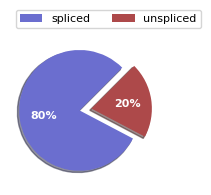

In [34]:
scv.pl.proportions(merge_data)

In [35]:
scv.tl.velocity(merge_data, mode = "deterministic") #deterministic ,stochastic

computing velocities
    finished (0:00:28) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [36]:
scv.tl.velocity_graph(merge_data)

computing velocity graph (using 1/8 cores)


  0%|          | 0/4026 [00:00<?, ?cells/s]

    finished (0:00:43) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:01) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


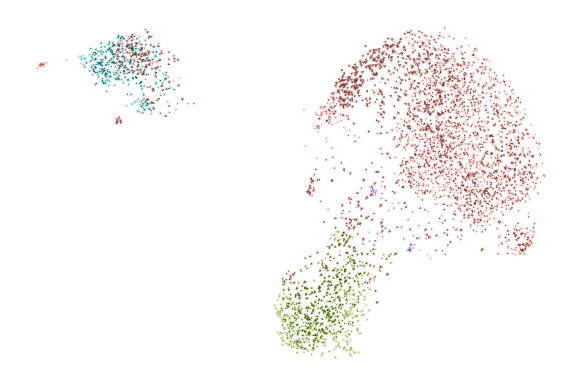

In [37]:
scv.pl.velocity_embedding(merge_data, basis = 'umap',color=merge_data.uns['Cluster_colors'],colorbar=False,dpi=120)

/Users/yaoyuelin/opt/anaconda3/lib/python3.8/site-packages/fontTools/misc/py23.py:11: DeprecationWarning: The py23 module has been deprecated and will be removed in a future release. Please update your code.
  warnings.warn(


saving figure to file ./figures/scvelo_velocity_state.pdf


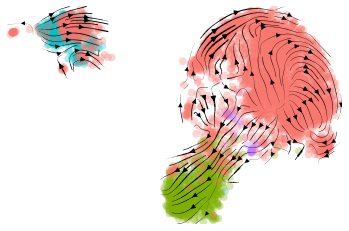

In [38]:
scv.pl.velocity_embedding_stream(merge_data, basis='umap',color=merge_data.uns['Cluster_colors'],colorbar=False,save='velocity_state.pdf')

recovering dynamics (using 1/8 cores)


  0%|          | 0/2521 [00:00<?, ?gene/s]

    finished (0:15:08) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:49) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/8 cores)


  0%|          | 0/4026 [00:00<?, ?cells/s]

    finished (0:00:15) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing terminal states
    identified 1 region of root cells and 1 region of end points .
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
computing latent time using root_cells as prior
    finished (0:00:19) --> added 
    'latent_time', shared time (adata.obs)
saving figure to file ./figures/scvelo_latent.pdf


/Users/yaoyuelin/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_pdf.py:1721: DeprecationWarning: NONE is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  img = img.convert(mode='P', dither=Image.NONE,
/Users/yaoyuelin/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_pdf.py:1722: DeprecationWarning: ADAPTIVE is deprecated and will be removed in Pillow 10 (2023-07-01). Use Palette.ADAPTIVE instead.
  palette=Image.ADAPTIVE, colors=num_colors)


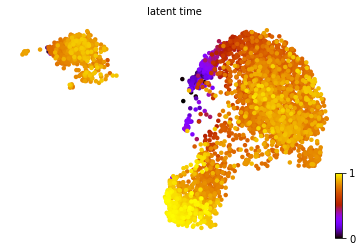

In [39]:
scv.tl.recover_dynamics(merge_data)
scv.tl.velocity(merge_data, mode='dynamical')
scv.tl.velocity_graph(merge_data)
scv.tl.latent_time(merge_data)
scv.pl.scatter(merge_data, color='latent_time', color_map='gnuplot', size=80, colorbar=True,save='latent.pdf')

computing velocity embedding
    finished (0:00:03) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


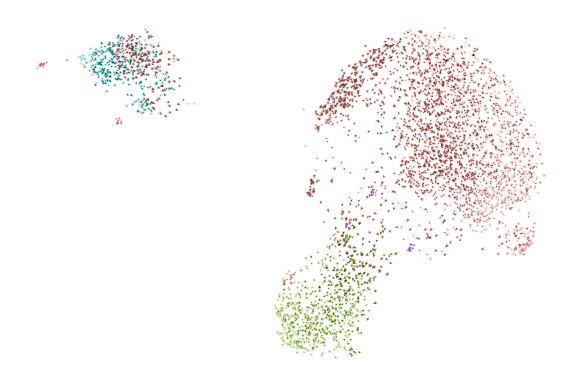

In [40]:
scv.pl.velocity_embedding(merge_data, basis = 'umap',color=merge_data.uns['Cluster_colors'],colorbar=False,dpi=120)

figure cannot be saved as pdf, using png instead.
saving figure to file ./figures/scvelo_velocity_dynamical.png


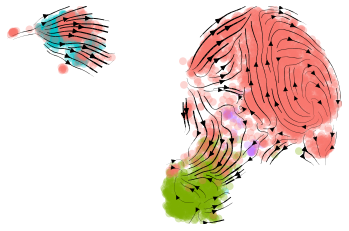

In [41]:
scv.pl.velocity_embedding_stream(merge_data, basis='umap', color=merge_data.uns['Cluster_colors'],colorbar=False,save='velocity_dynamical.pdf')

In [42]:
scv.tl.velocity(merge_data, mode = "stochastic")
scv.tl.velocity_graph(merge_data)

computing velocities
    finished (0:00:37) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/8 cores)


  0%|          | 0/4026 [00:00<?, ?cells/s]

    finished (0:01:00) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:01) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


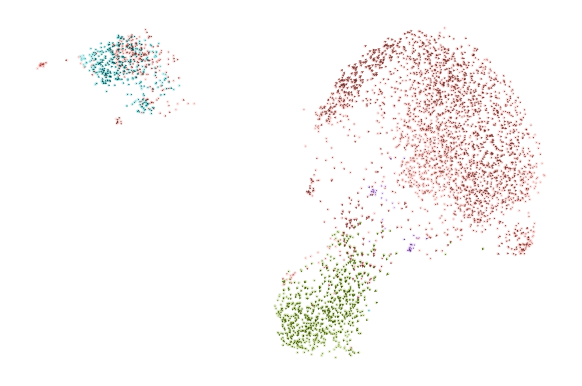

In [43]:
scv.pl.velocity_embedding(merge_data, basis = 'umap',color=merge_data.uns['Cluster_colors'],colorbar=False,dpi=120)

saving figure to file ./figures/scvelo_velocity_deterministic.pdf


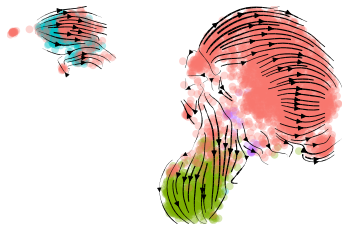

In [44]:
scv.pl.velocity_embedding_stream(merge_data, basis='umap',color=merge_data.uns['Cluster_colors'],colorbar=False,save='velocity_deterministic')

In [45]:
df = merge_data.var

In [46]:
df = df[(df['fit_likelihood'] > .1) & df['velocity_genes'] == True]

In [47]:
df 

,Accession,Chromosome,End,Start,Strand,gene_count_corr,velocity_gamma,velocity_qreg_ratio,velocity_r2,velocity_genes,...,fit_std_s,fit_likelihood,fit_u0,fit_s0,fit_pval_steady,fit_steady_u,fit_steady_s,fit_variance,fit_alignment_scaling,fit_r2
Gene,,,,,,,,,,,,,,,,,,,,,
AC149090.1,ENSMUSG00000095041,JH584304.1,59690,52190,-,-0.0294,0.034673,0.116563,0.286938,True,...,0.468883,0.185982,0.0,0.0,0.490435,0.233122,1.682776,1.027751,2.776801,0.312428
Sox17,ENSMUSG00000025902,1,4497354,4490931,-,0.0166,0.017212,0.049113,0.440848,True,...,0.434373,0.159898,0.0,0.0,0.391887,0.111743,1.453493,0.767629,1.159133,0.514096
Rims1,ENSMUSG00000041670,1,22805994,22286251,-,0.0043,4.936949,3.281014,0.188338,True,...,0.026580,0.190071,0.0,0.0,0.040789,0.228315,0.055485,0.293529,1.708108,0.188343
Neurl3,ENSMUSG00000047180,1,36274679,36264597,-,0.0668,0.480779,0.881693,0.485275,True,...,0.589698,0.387399,0.0,0.0,0.442964,1.338812,1.432196,0.369109,1.970187,0.485328
Mgat4a,ENSMUSG00000026110,1,37541016,37439340,-,-0.0400,0.098113,0.611019,0.325110,True,...,0.368606,0.194218,0.0,0.0,0.481119,1.092053,1.216220,1.257306,2.753915,0.397873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Gjb1,ENSMUSG00000047797,X,101385629,101376378,+,-0.0186,0.040272,0.178151,0.159924,True,...,0.792506,0.290701,0.0,0.0,0.484774,0.472388,2.437850,0.571094,1.457376,0.392313
Nono,ENSMUSG00000031311,X,101448591,101429318,+,0.0280,0.108175,0.307609,0.021669,True,...,0.254355,0.216528,0.0,0.0,0.376155,0.307732,0.860571,1.141811,2.728567,0.166183
Pcdh11x,ENSMUSG00000034755,X,120910619,120290259,+,-0.0112,0.303321,3.399763,0.266408,True,...,0.086193,0.345766,0.0,0.0,0.100249,0.812958,0.213301,0.384147,1.563205,0.268397


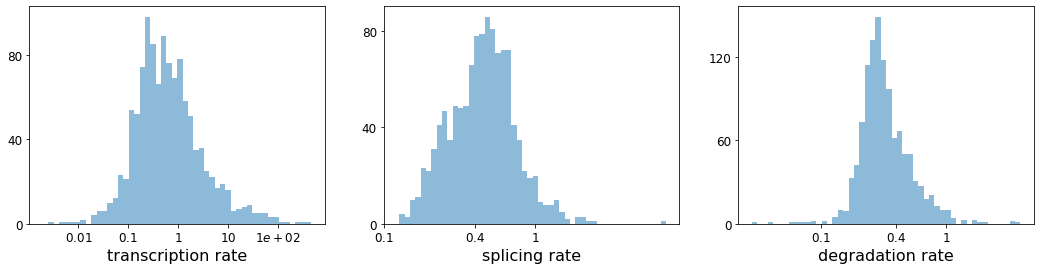

In [48]:
kwargs = dict(xscale='log', fontsize=16)
with scv.GridSpec(ncols=3) as pl:
    pl.hist(df['fit_alpha'], xlabel='transcription rate', **kwargs)
    pl.hist(df['fit_beta'] * df['fit_scaling'], xlabel='splicing rate', xticks=[.1, .4, 1], **kwargs)
    pl.hist(df['fit_gamma'], xlabel='degradation rate', xticks=[.1, .4, 1], **kwargs)

In [49]:
scv.get_df(merge_data, 'fit*', dropna=True)

,fit_alpha,fit_beta,fit_gamma,fit_t_,fit_scaling,fit_std_u,fit_std_s,fit_likelihood,fit_u0,fit_s0,fit_pval_steady,fit_steady_u,fit_steady_s,fit_variance,fit_alignment_scaling,fit_r2
Gene,,,,,,,,,,,,,,,,
AC149090.1,0.803116,2.268751,0.276018,7.620853,0.172226,0.063795,0.468883,1.859818e-01,0.0,0.0,4.904346e-01,0.233122,1.682776,1.027751,2.776801,0.312428
Rp1,0.012375,0.102704,0.182948,66.214721,3.480588,0.052178,0.016907,4.777633e-02,0.0,0.0,6.030307e-05,0.113323,0.051503,0.297883,3.218710,0.256835
Sox17,1.127163,9.737592,0.472501,4.978358,0.074938,0.040408,0.434373,1.598978e-01,0.0,0.0,3.918870e-01,0.111743,1.453493,0.767629,1.159133,0.514096
4732440D04Rik,0.067643,0.753555,0.239398,3.359976,0.749217,0.021425,0.035031,9.516511e-05,0.0,0.0,2.783778e-01,0.087891,0.125662,0.505305,1.871426,0.019096
Sntg1,0.026641,0.015086,0.231000,16.970843,21.234042,0.635229,0.034902,1.963099e-08,0.0,0.0,1.653043e-01,1.240476,0.098257,0.257707,3.641989,0.838842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vegfd,0.024118,0.328927,0.310123,9.004271,1.336562,0.020865,0.018046,1.839666e-05,0.0,0.0,1.011091e-01,0.066354,0.059832,0.500315,2.635154,0.034354
Asb11,0.105557,0.389580,0.225511,2.324177,3.874323,0.094569,0.037834,6.086712e-05,0.0,0.0,4.133642e-01,0.249288,0.092789,0.900964,1.026926,0.116928
Arhgap6,0.283156,0.061881,0.261374,5.812920,16.629081,1.905458,0.190642,3.780066e-01,0.0,0.0,2.653428e-01,3.957313,0.496115,0.400182,1.643549,0.379708


/Users/yaoyuelin/opt/anaconda3/lib/python3.8/site-packages/seaborn/rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/Users/yaoyuelin/opt/anaconda3/lib/python3.8/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


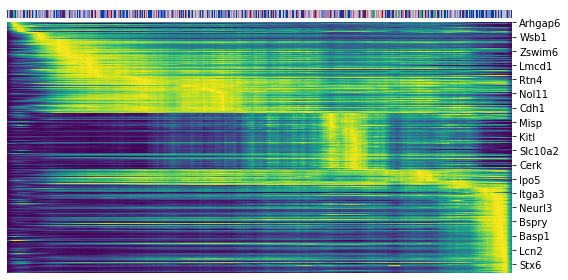

In [50]:
top_genes = merge_data.var['fit_likelihood'].sort_values(ascending=False).index[:300]
scv.pl.heatmap(merge_data, var_names=top_genes, sortby='latent_time',col_color='Clusters', n_convolve=100)

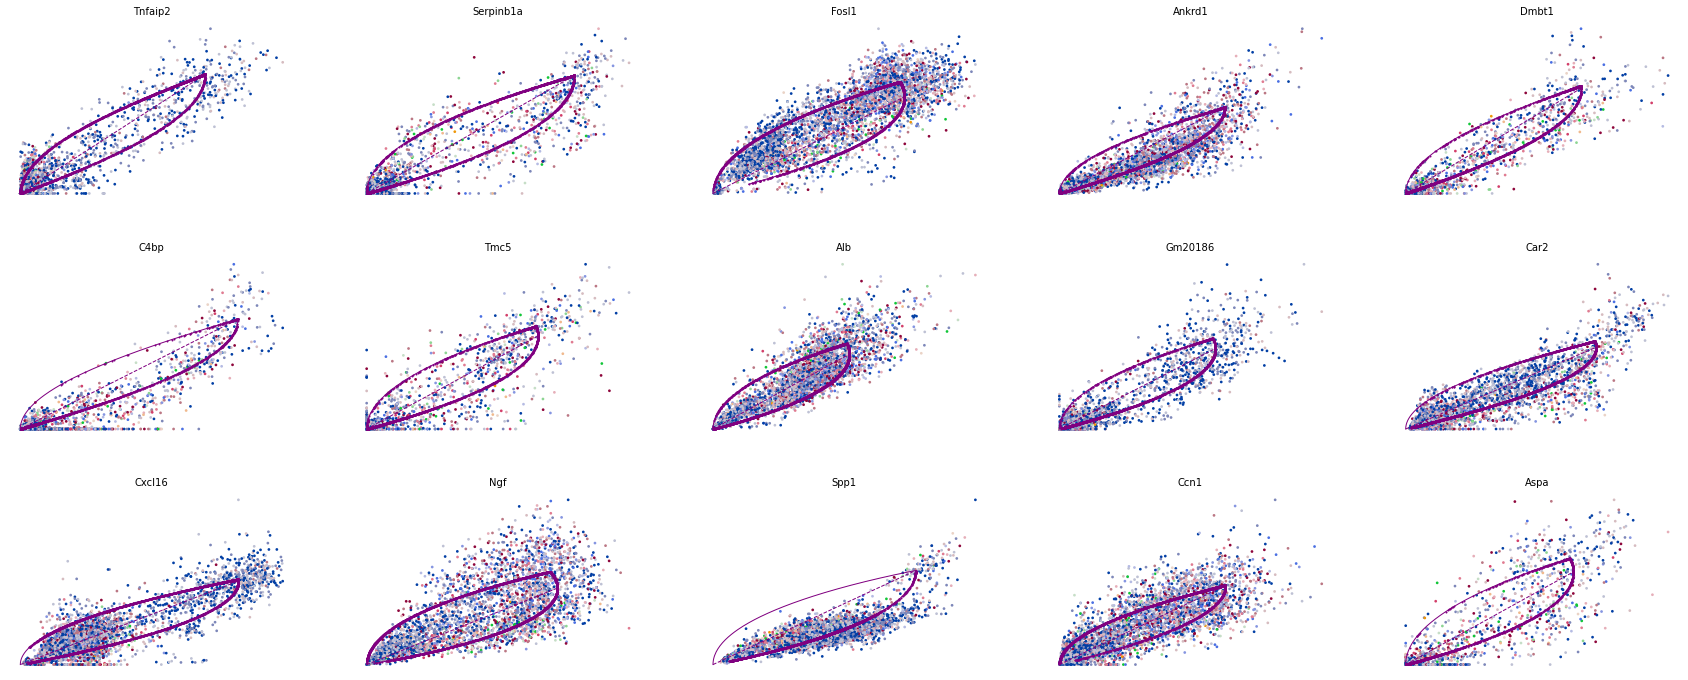

In [51]:
top_genes = merge_data.var['fit_likelihood'].sort_values(ascending=False).index
scv.pl.scatter(merge_data, basis=top_genes[:15], ncols=5, frameon=False,color='Clusters')

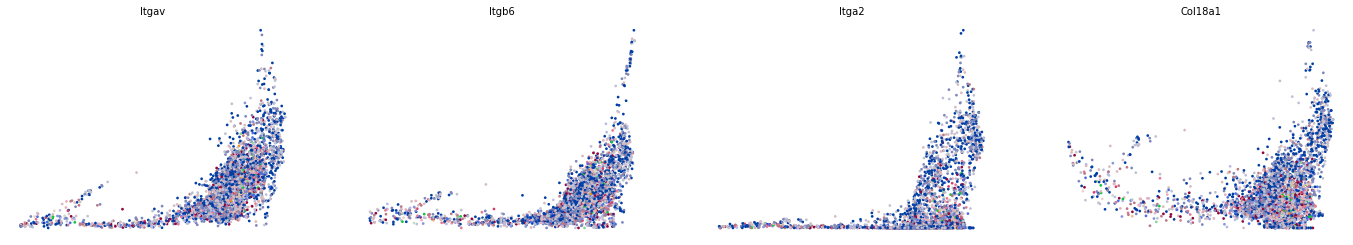

In [52]:
var_names = ["Itgav","Itgb6","Itga2","Col18a1"]
scv.pl.scatter(merge_data, x='latent_time', y=var_names, frameon=False,color='Clusters')

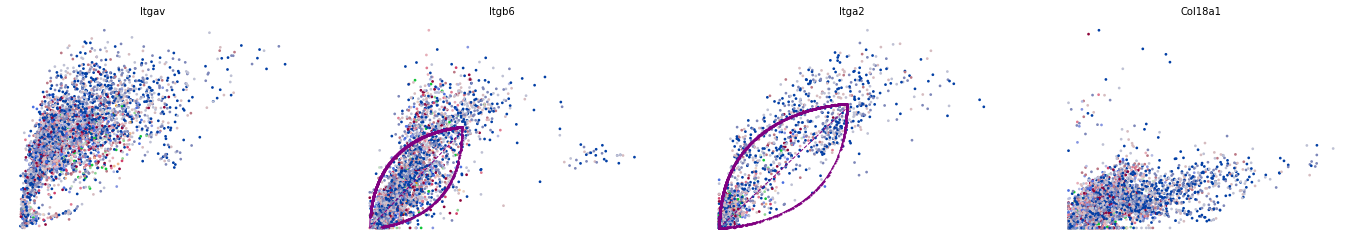

In [53]:
scv.pl.scatter(merge_data, basis=["Itgav","Itgb6","Itga2","Col18a1"], ncols=5, frameon=False,color='Clusters')

In [54]:
var_names = ["Itgav","Itgb6","Itga2","Col18a1"]
scv.tl.differential_kinetic_test(merge_data, var_names=var_names, groupby='Clusters')

recovering dynamics (using 1/8 cores)
    finished (0:00:05) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)

outputs model fit of gene: Itgav
testing for differential kinetics
    finished (0:00:01) --> added 
    'fit_diff_kinetics', clusters displaying differential kinetics (adata.var)
    'fit_pvals_kinetics', p-values of differential kinetics (adata.var)

outputs model fit of gene: Col18a1


In [55]:
merge_data

AnnData object with n_obs × n_vars = 4026 × 32285
    obs: 'Clusters', '_X', '_Y', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts', 'velocity_self_transition', 'root_cells', 'end_points', 'velocity_pseudotime', 'latent_time'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'gene_count_corr', 'velocity_gamma', 'velocity_qreg_ratio', 'velocity_r2', 'velocity_genes', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_', 'fit_scaling', 'fit_std_u', 'fit_std_s', 'fit_likelihood', 'fit_u0', 'fit_s0', 'fit_pval_steady', 'fit_steady_u', 'fit_steady_s', 'fit_variance', 'fit_alignment_scaling', 'fit_r2', 'fit_diff_kinetics', 'fit_pval_kinetics'
    uns: 'Cluster_colors', 'Cluster', 'pca', 'neighbors', 'velocity_params', 'velocity_graph', 'velocity_graph_neg', 'recover_dynamics', 'Clusters_colors'
    obsm: 'X_umap', 'X_pca', 'velocity_umap'
    varm: 'PCs', 'loss', 'fit_pvals_kinetics'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced', 'Ms', 'Mu', 'vel